## Home work 8

Name : Ramya Gopinath

USC ID : 4595082262

Github username : ramyagopinath08

In [187]:
#general import statements 
import pandas as pd
import numpy as np
import math

#train test split
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold

#Monte Carlo 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt 

#k means
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

#Spectral clustering
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt

In [2]:
# import warnings

# warnings.filterwarnings("ignore")

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

**(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.**

In [212]:
column_name = ['ID', 'Diagnosis'] + [x for x in range(1,31)]
df = pd.read_csv("../Data/wdbc.data", names = column_name)
df

ID Diagnosis      1      2       3       4        5        6  \
0      842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760   
1      842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864   
2    84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990   
3    84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390   
4    84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280   
..        ...       ...    ...    ...     ...     ...      ...      ...   
564    926424         M  21.56  22.39  142.00  1479.0  0.11100  0.11590   
565    926682         M  20.13  28.25  131.20  1261.0  0.09780  0.10340   
566    926954         M  16.60  28.08  108.30   858.1  0.08455  0.10230   
567    927241         M  20.60  29.33  140.10  1265.0  0.11780  0.27700   
568     92751         B   7.76  24.54   47.92   181.0  0.05263  0.04362   

           7        8  ...      21     22      23      24       25       26  \
0    0.30010  0.14710  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560   
1    0.08690  0.07017  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660   
2    0.19740  0.12790  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450   
3    0.24140  0.10520  ...  14.910  26.50   98.87   567.7  0.20980  0.86630   
4    0.19800  0.10430  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500   
..       ...      ...  ...     ...    ...     ...     ...      ...      ...   
564  0.24390  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130   
565  0.14400  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220   
566  0.09251  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940   
567  0.35140  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810   
568  0.00000  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444   

         27      28      29       30  
0    0.7119  0.2654  0.4601  0.11890  
1    0.2416  0.1860  0.2750  0.08902  
2    0.4504  0.2430  0.3613  0.08758  
3    0.6869  0.2575  0.6638  0.17300  
4    0.4000  0.1625  0.2364  0.07678  
..      ...     ...     ...      ...  
564  0.4107  0.2216  0.2060  0.07115  
565  0.3215  0.1628  0.2572  0.06637  
566  0.3403  0.1418  0.2218  0.07820  
567  0.9387  0.2650  0.4087  0.12400  
568  0.0000  0.0000  0.2871  0.07039  

[569 rows x 32 columns]

In [213]:
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [214]:
x = df.iloc[:,2:]
y = df.iloc[:,1:2]

y['Diagnosis'] = np.where(y["Diagnosis"] == "B", 0, 1)

C:\Users\ramya\AppData\Local\Temp/ipykernel_9120/2393765198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = np.where(y["Diagnosis"] == "B", 0, 1)


**(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,
recall, F1-score, and AUC) that you obtain from each algorithm.**

**i. Supervised Learning: Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.**

In [6]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)
# y_test.value_counts()

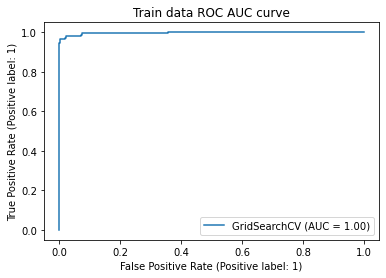

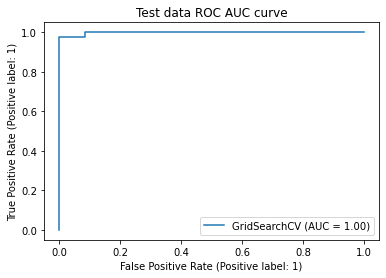

Confusion matrix for Train data : 
 [[283   2]
 [  6 164]]
Confusion matrix for Test data : 
 [[72  0]
 [ 2 40]]


In [7]:
accuracy_df = pd.DataFrame(columns=['Train','Test'])
precision_df =  pd.DataFrame(columns=['Train','Test'])
recall_df =  pd.DataFrame(columns=['Train','Test'])
f1score_df = pd.DataFrame(columns=['Train','Test'])
auc_df = pd.DataFrame(columns=['Train','Test'])

#Normalize the data
data_normalize = MinMaxScaler()

#Linear SVC L1 penalized 
L1_SVC_clf = LinearSVC(penalty='l1',dual=False, max_iter=10000)

#cross validation
cv_L1_SVC = StratifiedKFold(n_splits=5)

#c parameter
c_linear_svc = np.logspace(-3,6,10)
parameters = {'linearsvc__C' : c_linear_svc}

#pipeline
pipeline = Pipeline(steps = [['data_normalize' , data_normalize],['linearsvc' , L1_SVC_clf]])

for i in range(0,30):
    # x_train , y_train , x_test, y_test split
    x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), test_size=0.2, stratify=y , 
                                                        random_state= np.random.randint(i+1,i+1*500))
    #Grid search CV 
    grid = GridSearchCV(estimator=pipeline,param_grid=parameters,cv=cv_L1_SVC, n_jobs=-1)
    grid.fit(x_train,y_train)
    
    #predictions
    y_train_predict = grid.predict(x_train)
    y_test_predict = grid.predict(x_test)
    
    #accuracy train
    accuracy_train_val = accuracy_score(y_train,y_train_predict)
    accuracy_df.loc[i,'Train'] = accuracy_train_val

    accuracy_test_val = accuracy_score(y_test,y_test_predict)
    accuracy_df.loc[i,'Test'] = accuracy_test_val
    
    #precision
    precision_train_val = precision_score(y_train,y_train_predict)
    precision_df.loc[i,'Train'] = precision_train_val
    
    precision_test_val = precision_score(y_test,y_test_predict)
    precision_df.loc[i,'Test'] = precision_test_val
    
    #recall
    recall_train_val = recall_score(y_train,y_train_predict)
    recall_df.loc[i,'Train'] = recall_train_val
    
    recall_test_val = recall_score(y_test,y_test_predict)
    recall_df.loc[i,'Test'] = recall_test_val
    
    #F1 score
    f1score_train_val = f1_score(y_train,y_train_predict)
    f1score_df.loc[i,'Train'] = f1score_train_val
    
    f1score_test_val = f1_score(y_test,y_test_predict)
    f1score_df.loc[i,'Test'] = f1score_test_val
    
    #roc auc score
    auc_train_val = roc_auc_score(y_train,y_train_predict)
    auc_df.loc[i,'Train'] = auc_train_val
    
    auc_test_val = roc_auc_score(y_test,y_test_predict)
    auc_df.loc[i,'Test'] = auc_test_val
    
    #plotting roc auc curve
    if i == 16:
        RocCurveDisplay.from_estimator(grid,x_train,y_train)
        plt.title("Train data ROC AUC curve")
        plt.show()
        
        RocCurveDisplay.from_estimator(grid,x_test,y_test)
        plt.title("Test data ROC AUC curve")
        plt.show()
        
        confusion_train = confusion_matrix(y_train,y_train_predict)
        print(f"Confusion matrix for Train data : \n {confusion_train}")
    
        confusion_test = confusion_matrix(y_test,y_test_predict)
        print(f"Confusion matrix for Test data : \n {confusion_test}")

In [8]:
#reporting the average accuracy, precision, recall, F1-score, and AUC,
print(f"The average accuracy is :\n {accuracy_df.mean()}\n")
print(f"The average precision is : \n {precision_df.mean()}\n")
print(f"The average recall is : \n {recall_df.mean()}\n")
print(f"The average F1-score is : \n {f1score_df.mean()}\n")
print(f"The average AUC score is : \n {auc_df.mean()}\n")

The average accuracy is :
 Train    0.983516
Test     0.971053
dtype: float64

The average precision is : 
 Train    0.988981
Test     0.977474
dtype: float64

The average recall is : 
 Train    0.966667
Test     0.943651
dtype: float64

The average F1-score is : 
 Train    0.977674
Test     0.959828
dtype: float64

The average AUC score is : 
 Train    0.980117
Test     0.965344
dtype: float64



**ii. Semi-Supervised Learning/ Self-training: select 50% of the positive
class along with 50% of the negative class in the training set as labeled data
and the rest as unlabelled data. You can select them randomly.**

**A. Train an L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.**

In [9]:
#fucntion to split the data
#reference : https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/

def split_data(x,y):
    
    frame = [x,y]
    combined_df = pd.concat(frame,axis =1)
    
    positive_class = combined_df.loc[combined_df['Diagnosis'] == 1]
    negative_class = combined_df.loc[combined_df['Diagnosis'] == 0]
    
    pos_labled = positive_class.sample(frac = 0.5)
    neg_labled = negative_class.sample(frac = 0.5)
    
    pos_unlabled = positive_class.drop(pos_labled.index)
    neg_unlabled = negative_class.drop(neg_labled.index)
    
    label_frames = [pos_labled,neg_labled]
    label_data =  pd.concat(label_frames,ignore_index=True)
    
    unlabel_frames = [pos_unlabled,neg_unlabled]
    unlabel_data = pd.concat(unlabel_frames,ignore_index=True).drop('Diagnosis',axis=1)
    
    return label_data,unlabel_data

In [10]:
labeled_data , unlabeled_data = split_data(x,y)
# unlabeled_data

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


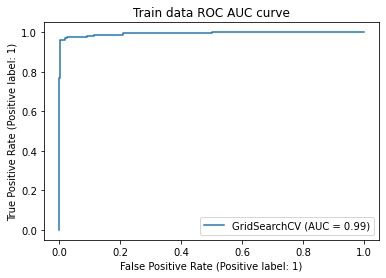

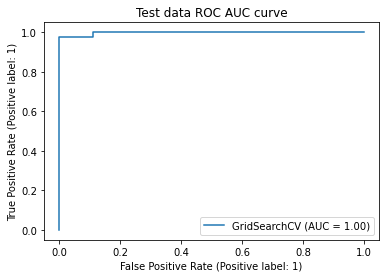

Confusion matrix for Train data : 
 [[282   3]
 [  7 163]]
Confusion matrix for Test data : 
 [[72  0]
 [ 1 41]]


In [11]:
#L1 SVM Labled data

accuracy_df = pd.DataFrame(columns=['Train','Test'])
precision_df =  pd.DataFrame(columns=['Train','Test'])
recall_df =  pd.DataFrame(columns=['Train','Test'])
f1score_df = pd.DataFrame(columns=['Train','Test'])
auc_df = pd.DataFrame(columns=['Train','Test'])

#Normalize the data
data_normalize = MinMaxScaler()
#Linear SVC L1 penalized 
L1_SVC_clf = LinearSVC(penalty='l1',dual=False, max_iter=10000)
#cross validation
cv_L1_SVC = StratifiedKFold(n_splits=5)
#c parameter
c_linear_svc = np.logspace(-3,6,10)
parameters = {'linearsvc__C' : c_linear_svc}

#pipeline
pipeline = Pipeline(steps = [['data_normalize' , data_normalize],['linearsvc' , L1_SVC_clf]])

for i in range(0,30):
    # x_train , y_train , x_test, y_test split
    x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), test_size=0.2, stratify=y , 
                                                        random_state= np.random.randint(i+1,i+1*500))
    x_train = pd.DataFrame.from_records(x_train)
    y_train = pd.DataFrame(y_train,columns=['Diagnosis'])
    
    #labled and unlabled dataframe 
    labeled_data,unlabeled_data = split_data(x_train,y_train)
#     print(i)
    
    #Grid search CV
    grid = GridSearchCV(estimator=pipeline,param_grid=parameters,cv=cv_L1_SVC, n_jobs=-1)

    while len(unlabeled_data) !=0:
         
        grid.fit(labeled_data.iloc[:,:-1],labeled_data.iloc[:,-1:].values.ravel())
        
         
        confidence_score = grid.decision_function(unlabeled_data)
        farthest_data_point = confidence_score.max()
        
        index_farthest_data_point = np.where(confidence_score == farthest_data_point)[0][0]

#         print(f"index: {index_farthest_data_point}")
        get_row = unlabeled_data.filter(items = [index_farthest_data_point], axis=0)

        y_pred = grid.predict(get_row)
        
        get_row['Diagnosis'] = y_pred
        labeled_data.append(get_row)
        
        unlabeled_data = unlabeled_data.drop(index_farthest_data_point).reset_index(drop=True)
#         print(f"length : {len(unlabeled_data)}")
    
    #predictions
    y_train_predict = grid.predict(x_train)
    y_test_predict = grid.predict(x_test)
    
    #accuracy train
    accuracy_train_val = accuracy_score(y_train,y_train_predict)
    accuracy_df.loc[i,'Train'] = accuracy_train_val

    accuracy_test_val = accuracy_score(y_test,y_test_predict)
    accuracy_df.loc[i,'Test'] = accuracy_test_val
    
    #precision
    precision_train_val = precision_score(y_train,y_train_predict)
    precision_df.loc[i,'Train'] = precision_train_val
    
    precision_test_val = precision_score(y_test,y_test_predict)
    precision_df.loc[i,'Test'] = precision_test_val
    
    #recall
    recall_train_val = recall_score(y_train,y_train_predict)
    recall_df.loc[i,'Train'] = recall_train_val
    
    recall_test_val = recall_score(y_test,y_test_predict)
    recall_df.loc[i,'Test'] = recall_test_val
    
    #F1 score
    f1score_train_val = f1_score(y_train,y_train_predict)
    f1score_df.loc[i,'Train'] = f1score_train_val
    
    f1score_test_val = f1_score(y_test,y_test_predict)
    f1score_df.loc[i,'Test'] = f1score_test_val
    
    #roc auc score
    auc_train_val = roc_auc_score(y_train,y_train_predict)
    auc_df.loc[i,'Train'] = auc_train_val
    
    auc_test_val = roc_auc_score(y_test,y_test_predict)
    auc_df.loc[i,'Test'] = auc_test_val
    
    #plotting roc auc curve
    if i == 16:
        RocCurveDisplay.from_estimator(grid,x_train,y_train)
        plt.title("Train data ROC AUC curve")
        plt.show()
        
        RocCurveDisplay.from_estimator(grid,x_test,y_test)
        plt.title("Test data ROC AUC curve")
        plt.show()
        
        confusion_train = confusion_matrix(y_train,y_train_predict)
        print(f"Confusion matrix for Train data : \n {confusion_train}")
    
        confusion_test = confusion_matrix(y_test,y_test_predict)
        print(f"Confusion matrix for Test data : \n {confusion_test}")

In [12]:
#reporting the average accuracy, precision, recall, F1-score, and AUC,
print(f"The average accuracy is :\n {accuracy_df.mean()}\n")
print(f"The average precision is : \n {precision_df.mean()}\n")
print(f"The average recall is : \n {recall_df.mean()}\n")
print(f"The average F1-score is : \n {f1score_df.mean()}\n")
print(f"The average AUC score is : \n {auc_df.mean()}\n")

The average accuracy is :
 Train    0.976484
Test     0.969006
dtype: float64

The average precision is : 
 Train    0.983072
Test     0.978008
dtype: float64

The average recall is : 
 Train    0.953725
Test     0.938095
dtype: float64

The average F1-score is : 
 Train    0.968027
Test     0.956982
dtype: float64

The average AUC score is : 
 Train    0.971892
Test     0.962566
dtype: float64



**iii. Unsupervised Learning: Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume k = 2.**

**A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?**

We can make sure that the algorithm is not trapped in a local minimum, by running the algorithm in multiple time with different starting points using randon state.

**B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F1-score, and AUC over M
runs, and ROC and the confusion matrix for one of the runs.**

**C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F1-score, and AUC over
M runs, and ROC and the confusion matrix for one of the runs for the
test data.**

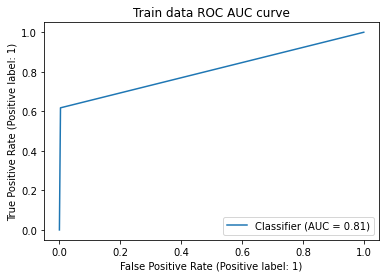

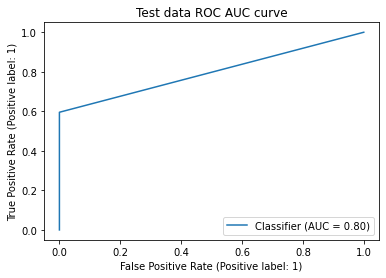

Confusion matrix for Train data : 
 [[284   1]
 [ 65 105]]
Confusion matrix for Test data : 
 [[72  0]
 [17 25]]


In [42]:
#K means  clustering
#Reference to find distance :
#https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster

accuracy_df = pd.DataFrame(columns=['Train','Test'])
precision_df =  pd.DataFrame(columns=['Train','Test'])
recall_df =  pd.DataFrame(columns=['Train','Test'])
f1score_df = pd.DataFrame(columns=['Train','Test'])
auc_df = pd.DataFrame(columns=['Train','Test'])

for i in range(0,30):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y , 
                                                        random_state= np.random.randint(i+1,i+1*500))

    k_means = KMeans(n_clusters=2, random_state= np.random.randint(i+2,i+2*500))
    k_means.fit(x_train)
    
    cluster_no_train = []
    x_distance_train = pd.DataFrame(k_means.transform(x_train), columns=['Cluster 0 distance','Cluster 1 distance'], index=x_train.index)
#     print(x_distance_train)
    
    cluster_0 = x_distance_train['Cluster 0 distance']
    cluster_1 = x_distance_train['Cluster 1 distance']
    
    closest_to_0 = cluster_0.sort_values().head(30)
    closest_to_1 = cluster_1.sort_values().head(30)
    
    predicted_cluster_0 = y_train.loc[closest_to_0.index].value_counts().idxmax()
    predicted_cluster_1 = y_train.loc[closest_to_1.index].value_counts().idxmax()
    
#     print(predicted_cluster_0)
#     print(predicted_cluster_1)
    y_train_predict = pd.DataFrame(columns=['Predicted Diagnosis'])
    y_train_predict['Predicted Diagnosis'] = np.where(k_means.labels_ == 1, predicted_cluster_1, predicted_cluster_0)
#     print(y_train_predict)
    
    cluster_no_test = []
    x_distance_test = k_means.transform(x_test)
    for point in range(len(x_distance_test)):
        cluster_predict = np.argmin(x_distance_test[point])
        if cluster_predict == 0:
            cluster_no_test.append(predicted_cluster_0)
        else:
            cluster_no_test.append(predicted_cluster_1)
#     print(cluster_no_test)
    cluster_no_test = np.array(cluster_no_test)
    
    accuracy_train_val = accuracy_score(y_test,cluster_no_test)
    accuracy_df.loc[i,'Test'] = accuracy_train_val
    
    #accuracy train
    accuracy_train_val = accuracy_score(y_train,y_train_predict)
    accuracy_df.loc[i,'Train'] = accuracy_train_val

    accuracy_test_val = accuracy_score(y_test,cluster_no_test)
    accuracy_df.loc[i,'Test'] = accuracy_test_val
    
    #precision
    precision_train_val = precision_score(y_train,y_train_predict)
    precision_df.loc[i,'Train'] = precision_train_val
    
    precision_test_val = precision_score(y_test,cluster_no_test)
    precision_df.loc[i,'Test'] = precision_test_val
    
    #recall
    recall_train_val = recall_score(y_train,y_train_predict)
    recall_df.loc[i,'Train'] = recall_train_val
    
    recall_test_val = recall_score(y_test,cluster_no_test)
    recall_df.loc[i,'Test'] = recall_test_val
    
    #F1 score
    f1score_train_val = f1_score(y_train,y_train_predict)
    f1score_df.loc[i,'Train'] = f1score_train_val
    
    f1score_test_val = f1_score(y_test,cluster_no_test)
    f1score_df.loc[i,'Test'] = f1score_test_val
    
    #roc auc score
    auc_train_val = roc_auc_score(y_train,y_train_predict)
    auc_df.loc[i,'Train'] = auc_train_val
    
    auc_test_val = roc_auc_score(y_test,cluster_no_test)
    auc_df.loc[i,'Test'] = auc_test_val
    
    #plotting roc auc curve
    if i == 16:
        RocCurveDisplay.from_predictions(y_train,y_train_predict)
        plt.title("Train data ROC AUC curve")
        plt.show()
        
        RocCurveDisplay.from_predictions(y_test,cluster_no_test)
        plt.title("Test data ROC AUC curve")
        plt.show()
        
        confusion_train = confusion_matrix(y_train,y_train_predict)
        print(f"Confusion matrix for Train data : \n {confusion_train}")
    
        confusion_test = confusion_matrix(y_test,cluster_no_test)
        print(f"Confusion matrix for Test data : \n {confusion_test}")
    

In [43]:
#reporting the average accuracy, precision, recall, F1-score, and AUC,
print(f"The average accuracy is :\n {accuracy_df.mean()}\n")
print(f"The average precision is : \n {precision_df.mean()}\n")
print(f"The average recall is : \n {recall_df.mean()}\n")
print(f"The average F1-score is : \n {f1score_df.mean()}\n")
print(f"The average AUC score is : \n {auc_df.mean()}\n")

The average accuracy is :
 Train    0.855751
Test     0.835673
dtype: float64

The average precision is : 
 Train    0.993390
Test     0.987337
dtype: float64

The average recall is : 
 Train    0.618039
Test     0.561111
dtype: float64

The average F1-score is : 
 Train    0.761782
Test     0.713027
dtype: float64

The average AUC score is : 
 Train    0.807792
Test     0.778472
dtype: float64



**iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus￾tering based on kernels.3 Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the
negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit − predict
method.**

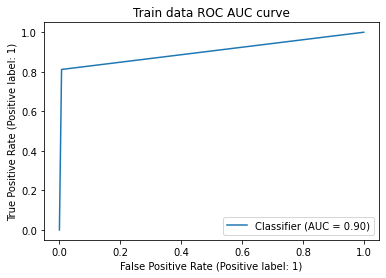

Confusion matrix for Train data : 
 [[283   2]
 [ 32 138]]


In [220]:
accuracy_df = pd.DataFrame(columns=['Train'])
precision_df =  pd.DataFrame(columns=['Train'])
recall_df =  pd.DataFrame(columns=['Train'])
f1score_df = pd.DataFrame(columns=['Train'])
auc_df = pd.DataFrame(columns=['Train'])

for i in range(0,30):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y , 
                                                        random_state= np.random.randint(i+1,i+1*500))
    
    min_max_scalar = MinMaxScaler()
    x_normalized = min_max_scalar.fit_transform(x_train)
    
    spectral_clf = SpectralClustering(affinity='rbf', gamma= 1, n_clusters=2, assign_labels='discretize')
    predict_train = spectral_clf.fit_predict(x_normalized)
    
    predicted_label_train = pd.DataFrame(predict_train.labels_ , columns=['Cluster_predicted'])
#     print(predicted_label_train)
    #Finding the clusters 
    cluster_0 = predicted_label_train[predicted_label_train['Cluster_predicted']==0]
    cluster_1 = predicted_label_train[predicted_label_train['Cluster_predicted']==1]
#     print(cluster_0)
    #find the majority in each cluster
    majority_label_0 = cluster_0['Cluster_predicted'].value_counts().idxmax()
    majority_label_1 = cluster_1['Cluster_predicted'].value_counts().idxmax()
    
    #assign the majority lables
    y_train_predict = np.where(predicted_label_train['Cluster_predicted'] == 1, majority_label_1,majority_label_0)
    
    y_labels_test = spectral_clf.fit_predict()
    
    #accuracy train
    accuracy_train_val = accuracy_score(y_train,y_train_predict)
    accuracy_df.loc[i,'Train'] = accuracy_train_val

#     accuracy_test_val = accuracy_score(y_test,cluster_no_test)
#     accuracy_df.loc[i,'Test'] = accuracy_test_val
    
    #precision
    precision_train_val = precision_score(y_train,y_train_predict)
    precision_df.loc[i,'Train'] = precision_train_val
    
#     precision_test_val = precision_score(y_test,cluster_no_test)
#     precision_df.loc[i,'Test'] = precision_test_val
    
    #recall
    recall_train_val = recall_score(y_train,y_train_predict)
    recall_df.loc[i,'Train'] = recall_train_val
    
#     recall_test_val = recall_score(y_test,cluster_no_test)
#     recall_df.loc[i,'Test'] = recall_test_val
    
    #F1 score
    f1score_train_val = f1_score(y_train,y_train_predict)
    f1score_df.loc[i,'Train'] = f1score_train_val
    
#     f1score_test_val = f1_score(y_test,cluster_no_test)
#     f1score_df.loc[i,'Test'] = f1score_test_val
    
    #roc auc score
    auc_train_val = roc_auc_score(y_train,y_train_predict)
    auc_df.loc[i,'Train'] = auc_train_val
    
#     auc_test_val = roc_auc_score(y_test,cluster_no_test)
#     auc_df.loc[i,'Test'] = auc_test_val
    
    #plotting roc auc curve
    if i == 16:
        RocCurveDisplay.from_predictions(y_train,y_train_predict)
        plt.title("Train data ROC AUC curve")
        plt.show()
        
#         RocCurveDisplay.from_predictions(y_test,cluster_no_test)
#         plt.title("Test data ROC AUC curve")
#         plt.show()
        
        confusion_train = confusion_matrix(y_train,y_train_predict)
        print(f"Confusion matrix for Train data : \n {confusion_train}")
    
#         confusion_test = confusion_matrix(y_test,cluster_no_test)
#         print(f"Confusion matrix for Test data : \n {confusion_test}")
    

In [221]:
#reporting the average accuracy, precision, recall, F1-score, and AUC,
print(f"The average accuracy is :\n {accuracy_df.mean()}\n")
print(f"The average precision is : \n {precision_df.mean()}\n")
print(f"The average recall is : \n {recall_df.mean()}\n")
print(f"The average F1-score is : \n {f1score_df.mean()}\n")
print(f"The average AUC score is : \n {auc_df.mean()}\n")

The average accuracy is :
 Train    0.720586
dtype: float64

The average precision is : 
 Train    0.77289
dtype: float64

The average recall is : 
 Train    0.654314
dtype: float64

The average F1-score is : 
 Train    0.703103
dtype: float64

The average AUC score is : 
 Train    0.707215
dtype: float64



**v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.**

Results

## 2. Active Learning Using Support Vector Machines

**(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a
binary classification problem.**

In [204]:
banknote_df = pd.read_csv("../Data/data_banknote_authentication.txt", sep=",", names =['variance','skewness','curtosis','entropy','class'])
banknote_df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [205]:
#x and y split
x = banknote_df.iloc[:,:-1]
y = banknote_df.iloc[:,-1:]

**(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.**

**i. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the penalty parameter using
5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, 
until you use all the 900 points. Do NOT
replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10,
20, 30, ... , 900 data points and their 90 test errors. You have implemented
passive learning.**

In [206]:
#Passive learning

error_test_val_passive = pd.DataFrame()


for run_no in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y,test_size=472)
    x_train_copy = x_train.copy()
    svm_datapoints_x = pd.DataFrame()
    svm_datapoints_y = pd.DataFrame()
   
    #Linear SVC L1 penalized 
    svm_classifier = LinearSVC(penalty='l1',dual=False, max_iter=10000)
    #cross validation
    cv_L1_SVC = StratifiedKFold(n_splits=5)
    #c parameter
    c_linear_svc = {'C' : np.logspace(-3,6,10)}
    
    svm_run = 0
    
    while(len(x_train_copy)>0):
        
        sample_x_train = x_train_copy.sample(10)
        svm_datapoints_x = pd.concat([svm_datapoints_x,sample_x_train])
        svm_datapoints_y = y_train.loc[svm_datapoints_x.index]

        x_train_copy = x_train_copy.drop(sample_x_train.index, axis=0)
        
        grid_CV = GridSearchCV(estimator=svm_classifier, param_grid=c_linear_svc, cv = cv_L1_SVC)
        grid_CV.fit(svm_datapoints_x,svm_datapoints_y.values.ravel())
        
        y_test_predict = grid_CV.predict(x_test)
        
        svm_run = svm_run + 1
        error_test_val_passive.loc[run_no,'SVM'+str(svm_run)] = 1 - grid_CV.score(x_test,y_test)
        

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 mem

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [207]:
error_test_val_passive

SVM1      SVM2      SVM3      SVM4      SVM5      SVM6      SVM7  \
0  0.040254  0.038136  0.014831  0.048729  0.029661  0.029661  0.014831   
1  0.137712  0.141949  0.091102  0.010593  0.010593  0.010593  0.010593   
2  0.146186  0.036017  0.023305  0.004237  0.019068  0.029661  0.031780   
3  0.152542  0.033898  0.033898  0.063559  0.016949  0.016949  0.014831   
4  0.163136  0.088983  0.029661  0.012712  0.021186  0.016949  0.012712   
5  0.031780  0.031780  0.029661  0.019068  0.021186  0.014831  0.014831   
6  0.144068  0.021186  0.023305  0.023305  0.010593  0.012712  0.027542   
7  0.110169  0.029661  0.031780  0.033898  0.036017  0.029661  0.036017   
8  0.033898  0.014831  0.006356  0.019068  0.033898  0.033898  0.033898   
9  0.014831  0.021186  0.016949  0.014831  0.014831  0.008475  0.008475   

       SVM8      SVM9     SVM10  ...     SVM81     SVM82     SVM83     SVM84  \
0  0.023305  0.023305  0.023305  ...  0.019068  0.019068  0.019068  0.019068   
1  0.008475  0.008475  0.010593  ...  0.006356  0.006356  0.006356  0.006356   
2  0.016949  0.010593  0.010593  ...  0.004237  0.004237  0.004237  0.004237   
3  0.006356  0.019068  0.014831  ...  0.012712  0.012712  0.012712  0.008475   
4  0.010593  0.006356  0.006356  ...  0.006356  0.006356  0.006356  0.006356   
5  0.023305  0.019068  0.023305  ...  0.010593  0.010593  0.010593  0.010593   
6  0.008475  0.008475  0.008475  ...  0.004237  0.004237  0.004237  0.004237   
7  0.036017  0.036017  0.038136  ...  0.019068  0.019068  0.019068  0.019068   
8  0.027542  0.027542  0.021186  ...  0.012712  0.012712  0.012712  0.012712   
9  0.010593  0.010593  0.008475  ...  0.008475  0.008475  0.008475  0.008475   

      SVM85     SVM86     SVM87     SVM88     SVM89     SVM90  
0  0.019068  0.019068  0.019068  0.019068  0.019068  0.019068  
1  0.006356  0.006356  0.006356  0.006356  0.006356  0.006356  
2  0.004237  0.004237  0.004237  0.004237  0.004237  0.004237  
3  0.008475  0.008475  0.008475  0.010593  0.010593  0.008475  
4  0.008475  0.008475  0.008475  0.008475  0.008475  0.008475  
5  0.010593  0.010593  0.010593  0.010593  0.010593  0.010593  
6  0.004237  0.004237  0.004237  0.004237  0.004237  0.004237  
7  0.019068  0.014831  0.012712  0.012712  0.012712  0.012712  
8  0.012712  0.014831  0.012712  0.014831  0.014831  0.014831  
9  0.008475  0.008475  0.008475  0.008475  0.008475  0.008475  

[10 rows x 90 columns]

**ii. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning.**

In [208]:
#Active learning

error_test_val_active = pd.DataFrame()


for run_no in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y,test_size=472)
    x_train_copy = x_train.copy()
    svm_datapoints_x = pd.DataFrame()
    svm_datapoints_y = pd.DataFrame()
   
    #Linear SVC L1 penalized 
    svm_classifier = LinearSVC(penalty='l1',dual=False, max_iter=10000)
    #cross validation
    cv_L1_SVC = StratifiedKFold(n_splits=5)
    #c parameter
    c_linear_svc = {'C' : np.logspace(-3,6,10)}
    
    svm_run = 0
    
    while(len(x_train_copy)>0):
        if len(svm_datapoints_x) == 0:
            svm_datapoints_x,svm_datapoints_y = data_point_selection(x_train_copy,y_train)
        else:
            nearest_points = pd.DataFrame(grid_CV.decision_function(x_train_copy),index=x_train_copy.index)
            sample_nearest_points = nearest_points.nsmallest(10,columns=0)
            svm_datapoints_x = pd.concat([svm_datapoints_x,x_train_copy.loc[sample_nearest_points.index]])
            svm_datapoints_y = y_train.loc[svm_datapoints_x.index]
        
        x_train_copy = x_train.drop(svm_datapoints_x.index)
        y_train_copy = y_train.drop(svm_datapoints_x.index)
        
        grid_CV = GridSearchCV(estimator=svm_classifier, param_grid=c_linear_svc, cv = cv_L1_SVC)
        grid_CV.fit(svm_datapoints_x,svm_datapoints_y.values.ravel())
        
        svm_run = svm_run + 1
        error_test_val_active.loc[run_no,'SVM'+str(svm_run)] = 1 - grid_CV.score(x_test,y_test)
        

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\s

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\s

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblin

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\s

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [210]:
error_test_val_active

SVM1      SVM2      SVM3      SVM4      SVM5      SVM6      SVM7  \
0  0.197034  0.322034  0.150424  0.322034  0.322034  0.322034  0.322034   
1  0.163136  0.161017  0.161017  0.177966  0.161017  0.161017  0.161017   
2  0.245763  0.239407  0.171610  0.247881  0.444915  0.084746  0.082627   
3  0.084746  0.158898  0.158898  0.158898  0.158898  0.158898  0.158898   
4  0.112288  0.091102  0.154661  0.154661  0.154661  0.154661  0.154661   
5  0.019068  0.019068  0.019068  0.019068  0.019068  0.019068  0.019068   
6  0.148305  0.150424  0.105932  0.118644  0.205508  0.158898  0.105932   
7  0.025424  0.072034  0.025424  0.025424  0.025424  0.065678  0.065678   
8  0.152542  0.152542  0.152542  0.133475  0.129237  0.152542  0.129237   
9  0.127119  0.127119  0.127119  0.127119  0.108051  0.133475  0.108051   

       SVM8      SVM9     SVM10  ...     SVM81     SVM82     SVM83     SVM84  \
0  0.322034  0.322034  0.322034  ...  0.006356  0.012712  0.006356  0.012712   
1  0.161017  0.161017  0.161017  ...  0.012712  0.012712  0.012712  0.012712   
2  0.082627  0.082627  0.082627  ...  0.008475  0.008475  0.008475  0.008475   
3  0.158898  0.158898  0.158898  ...  0.012712  0.012712  0.012712  0.012712   
4  0.154661  0.154661  0.154661  ...  0.002119  0.002119  0.002119  0.002119   
5  0.019068  0.019068  0.019068  ...  0.023305  0.023305  0.023305  0.023305   
6  0.203390  0.152542  0.114407  ...  0.006356  0.006356  0.006356  0.006356   
7  0.065678  0.065678  0.065678  ...  0.021186  0.021186  0.021186  0.021186   
8  0.125000  0.129237  0.127119  ...  0.004237  0.004237  0.004237  0.004237   
9  0.108051  0.116525  0.122881  ...  0.019068  0.019068  0.019068  0.019068   

      SVM85     SVM86     SVM87     SVM88     SVM89     SVM90  
0  0.012712  0.012712  0.012712  0.012712  0.012712  0.012712  
1  0.012712  0.012712  0.012712  0.012712  0.012712  0.012712  
2  0.008475  0.008475  0.008475  0.008475  0.008475  0.008475  
3  0.012712  0.012712  0.012712  0.012712  0.012712  0.012712  
4  0.002119  0.002119  0.002119  0.002119  0.002119  0.002119  
5  0.014831  0.014831  0.014831  0.014831  0.014831  0.014831  
6  0.006356  0.006356  0.006356  0.006356  0.006356  0.006356  
7  0.021186  0.021186  0.021186  0.021186  0.021186  0.021186  
8  0.004237  0.004237  0.004237  0.004237  0.004237  0.004237  
9  0.019068  0.019068  0.019068  0.019068  0.019068  0.019068  

[10 rows x 90 columns]

In [136]:
def data_point_selection(x,y):
    sample_x = x.sample(10)
    y_new = y.loc[sample_x.index]
    if (len(y_new['class'].value_counts())==2):
        return sample_x,y_new
    else:
        data_point_selection(x,y)

**(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.**

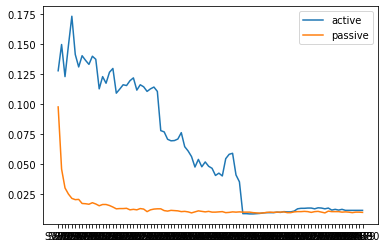

In [211]:
plt.plot(error_test_val_active.mean())
plt.plot(error_test_val_passive.mean())
plt.legend(['active','passive'])
plt.show()